In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data = pd.read_csv("anon-data/dockerfiles.csv")
control = pd.read_csv("anon-data/control.txt", names=["id"])
experimental = pd.read_csv("anon-data/experimental.txt", names=["id"])


In [17]:
control_list = [x[0] for x in control.values.tolist()]
experimental_list = [x[0] for x in experimental.values.tolist()]

In [18]:
data_control = data[data["id"].isin(control_list)].drop('id', axis=1)
data_experimental = data[data["id"].isin(experimental_list)].drop('id', axis=1)

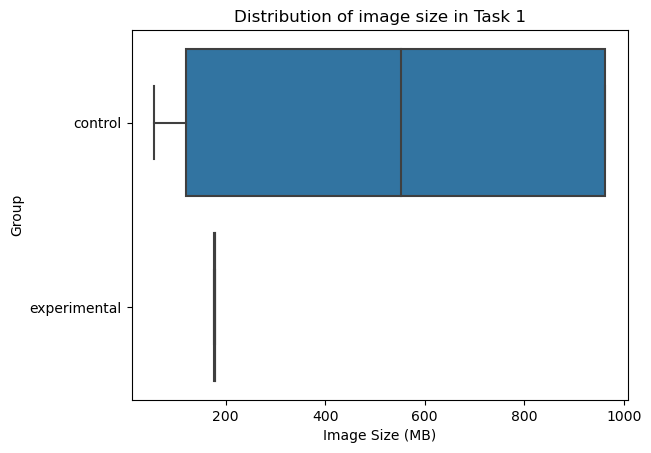

In [19]:
ctrl_with_group = data_control.assign(group = ["control"] * len(data_control))
exp_with_group = data_experimental.assign(group = ["experimental"] * len(data_experimental))

merged_data = pd.concat([ctrl_with_group, exp_with_group])

cols = [f"Image Size (Task 1)",
        "group"]

subset = merged_data[cols]

subset = subset.rename(columns={"Image Size (Task 1)": "Image Size (MB)", "group": "Group"})

sns.boxplot(x="Image Size (MB)",y="Group", data=subset)
plt.title("Distribution of image size in Task 1")
plt.savefig(f"images/image_size_task_1.svg")
plt.show()


In [20]:
textual_data = data[["Notes (Task 2)", "Notes (Task 3)"]]
textual_data

,Notes (Task 2),Notes (Task 3)
0,Created a separate directory and moved the fil...,Added npm install but did not remove useless n...
1,Changed the working directory twice and change...,Added npm install and removed useless nodejs i...
2,Changed the working directory and the user.,Added npm install and removed the useless node...
3,Changed the working directory and the user.,Added npm install and removed the useless node...
4,One of the files is still accessed and the wor...,Added npm install and removed the useless node...
5,Changed the working directory and the user.,Added npm install and removed the useless node...
6,Sets user to root at the start and to node at ...,Added npm install but did not remove useless n...


In [21]:
boolean_sections = [
    ["Successful Build? (Task 1)", "Successful Execution? (Task 1)"],
    ["Successful Build? (Task 2)", "Successful Execution? (Task 2)"],
    ["Successful Build? (Task 3)", "Successful Execution? (Task 3)"],
]

for i in boolean_sections:
    print(data[i])

  Successful Build? (Task 1) Successful Execution? (Task 1)
0                        Yes                            Yes
1                        Yes                            Yes
2                        Yes                            Yes
3                        Yes                            Yes
4                        Yes                            Yes
5                        Yes                            Yes
6                        Yes                            Yes
  Successful Build? (Task 2) Successful Execution? (Task 2)
0                        Yes                            Yes
1                        Yes                            Yes
2                        Yes                            Yes
3                        Yes                            Yes
4                        Yes                             No
5                        Yes                            Yes
6                        Yes                            Yes
  Successful Build? (Task 3) Successful 